In [ ]:
#@title 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/computer-vision-um/cv-um-2021/trabajo-final/

# Trabajo Final: Ejercicio 1

Este ejercicio consiste en trabajar sobre la primera parte del curso para extraer un modelo geométrico de una imagen.

Para este ejercicio vamos a trabajar sobre una imagen de una cancha de Fútbol.

Se probeen las funciones `draw_lines` y `draw_lines_polar` que les pueden servir para dibujar las rectas encontradas. 

\**En los ejercicios del trabajo final es posible utilizar funciones de librerias existentes o código sacado de internet. Siempre y cuando **no se usen para resolver explicitamente lo que pide el ejercicio** y al código sacado de interenet le agreguen el link en comentarios de donde fue sacado ese código.*

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from image_utils import draw_lines, draw_lines_polar

In [2]:
input_image = 'images/football.png'

### Load Input Image ###

In [3]:
image = cv2.imread(input_image,cv2.IMREAD_GRAYSCALE)/255

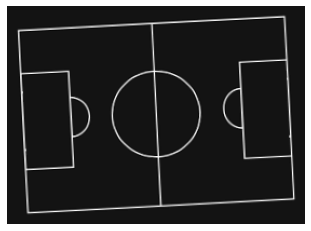

In [4]:
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

In [5]:
image_bgr = cv2.imread(input_image,cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

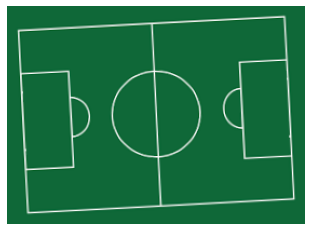

In [6]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

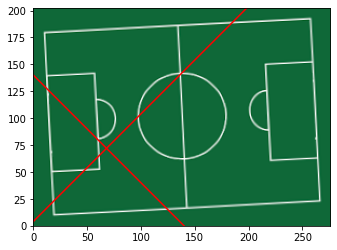

In [7]:
draw_lines(image_rgb,[[1,4],[-1,140]])

drawing rho 20 theta 120
drawing rho 100 theta 90


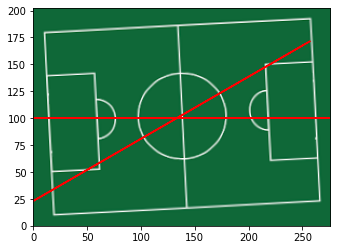

In [8]:
draw_lines_polar(image_rgb,[[20,120],[100,90]],theta_grad=True)

### Imágen de bordes ###

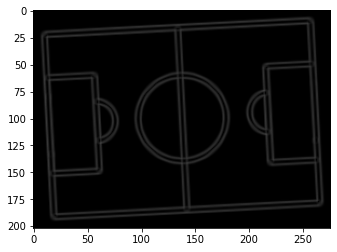

In [9]:
# Imágen a escala de grises 
img = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)/255.

# Filtro para reducir ruido
kernel_size = 5
sigma = 3
img = cv2.GaussianBlur(img,(kernel_size,kernel_size),sigma)

# Obtención de bordes
filter_edge = np.array([-1,0,1]).reshape(1,3)
img_edge_h = cv2.filter2D(img,-1, filter_edge.T)
img_edge_v = cv2.filter2D(img, -1, filter_edge)

# Imágen de bordes (intensidad)
intensitity_image = np.sqrt(np.power(img_edge_h, 2) + np.power(img_edge_v,2))
plt.imshow(intensitity_image, cmap='gray', vmin=0, vmax=1)
plt.show()